# 基於距離之離群值因子 (Distance-Based Outliers Factor)

##### 先引入我們需要的packages

In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt

# MNIST Dataset

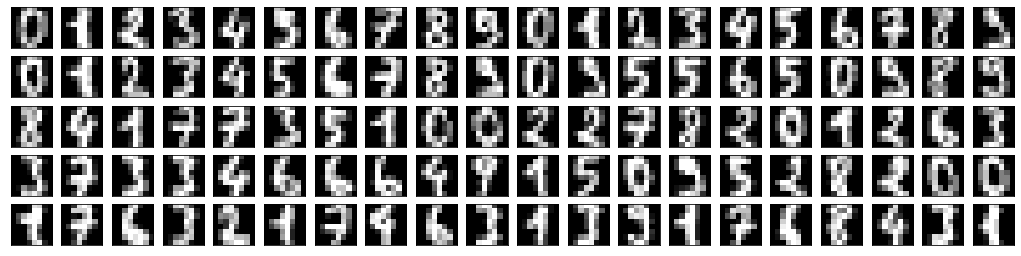

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
X=(digits.data/16)
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# PCA

In [4]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# DOF

In [5]:
from scipy.spatial.distance import cdist
N=X.shape[0]
distance = cdist(X,X,"euclidean").ravel()
threshold=1.8
distance_bool=(distance<threshold).reshape(N,N)
outlier_index=np.array(np.where(np.sum(distance_bool,axis=1)<5)).flatten()
print(outlier_index)

[   9   77  341  421  673  757  769  792  891  905  985 1024 1038 1100
 1113 1149 1150 1152 1154 1195 1264 1274 1551 1552 1562 1572 1574 1580
 1581 1593 1595 1628 1660 1685 1690 1712 1727 1729]


# Plot

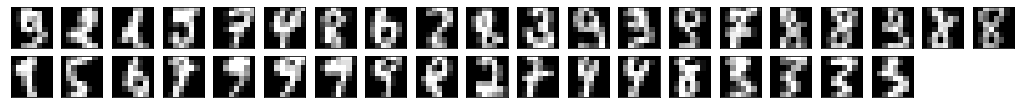

In [6]:
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(len(outlier_index)):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[outlier_index[i]], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

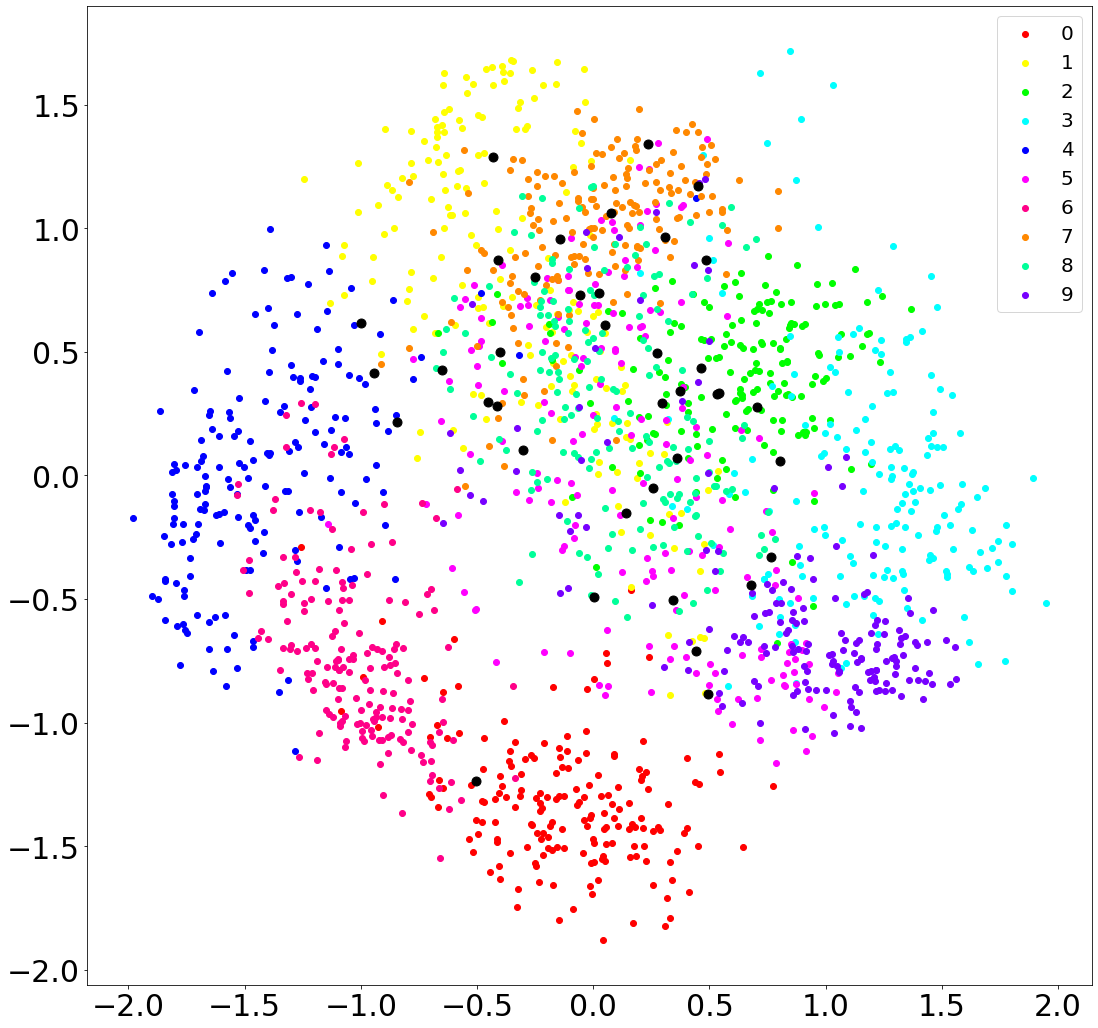

In [7]:
X_emb=PCA(X,2,N)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(len(outlier_index)):
    plt.plot(X_emb[outlier_index[i],0],X_emb[outlier_index[i],1],"ko",markersize=9)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(X_emb[BOOL,0],X_emb[BOOL,1],c=color[i],label=i)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()